In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Provide the path to the trajectory .dcd and .prmtop files 
top='/home/rutika/nucleosome/production/ack/1kx5_ack.prmtop'
traj='/home/rutika/nucleosome/production/ack/1kx5_ack_015_unwrap_1us.dcd'
u = mda.Universe(top,traj)

/home/rutika/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/TOPParser.py:295: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)
/home/rutika/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
#select the residues to plot the distances by providing resid 
from MDAnalysis.analysis import distances
sel1 = u.select_atoms('resid 855 861 862 865 866 870 873 874 877 878 879 880')
sel2 = u.select_atoms('resid 855 861 862 865 866 870 873 874 877 878 879 880')
avg = np.zeros((12,12), dtype=float)
for ts in u.trajectory:
    sel1_com = sel1.center_of_mass(compound='residues')
    sel2_com = sel2.center_of_mass(compound='residues')
    res_dist = distances.distance_array(sel1_com, sel2_com,
                                    box=u.dimensions)
    avg = avg + res_dist
res_dist_avg= avg/len(u.trajectory)
print(res_dist_avg)
n_LID = len(sel1_com)
n_NMP = len(sel2_com)
DH = pd.DataFrame(res_dist_avg)
DH.to_csv("Contact_ack_015_h2b2.csv")

[[ 0.         14.98866674 16.28622003 17.64803991 19.26563435 21.22893937
  23.75364889 22.26758358 25.69462976 24.30534079 25.76657934 28.31636517]
 [14.98866674  0.          6.69543353 10.91300024 13.37267961 16.72803567
  20.68088792 19.57053874 23.19474611 21.69567574 22.08833514 25.00880785]
 [16.28622003  6.69543353  0.          8.36017213 11.05017373 14.89257423
  19.6191089  18.66571111 22.61800796 21.3329848  21.86931903 24.7538328 ]
 [17.64803991 10.91300024  8.36017213  0.          7.19424548 11.08336236
  17.37772365 16.86800197 21.08292098 20.36967842 20.86745796 23.51007703]
 [19.26563435 13.37267961 11.05017373  7.19424548  0.          8.44450578
  15.36690632 14.60855469 18.73092149 17.93824777 18.27438228 21.12757055]
 [21.22893937 16.72803567 14.89257423 11.08336236  8.44450578  0.
   9.3630784   9.56512222 13.358619   14.02235223 14.60650398 16.31917062]
 [23.75364889 20.68088792 19.6191089  17.37772365 15.36690632  9.3630784
   0.          6.25899664  6.78803456 10.

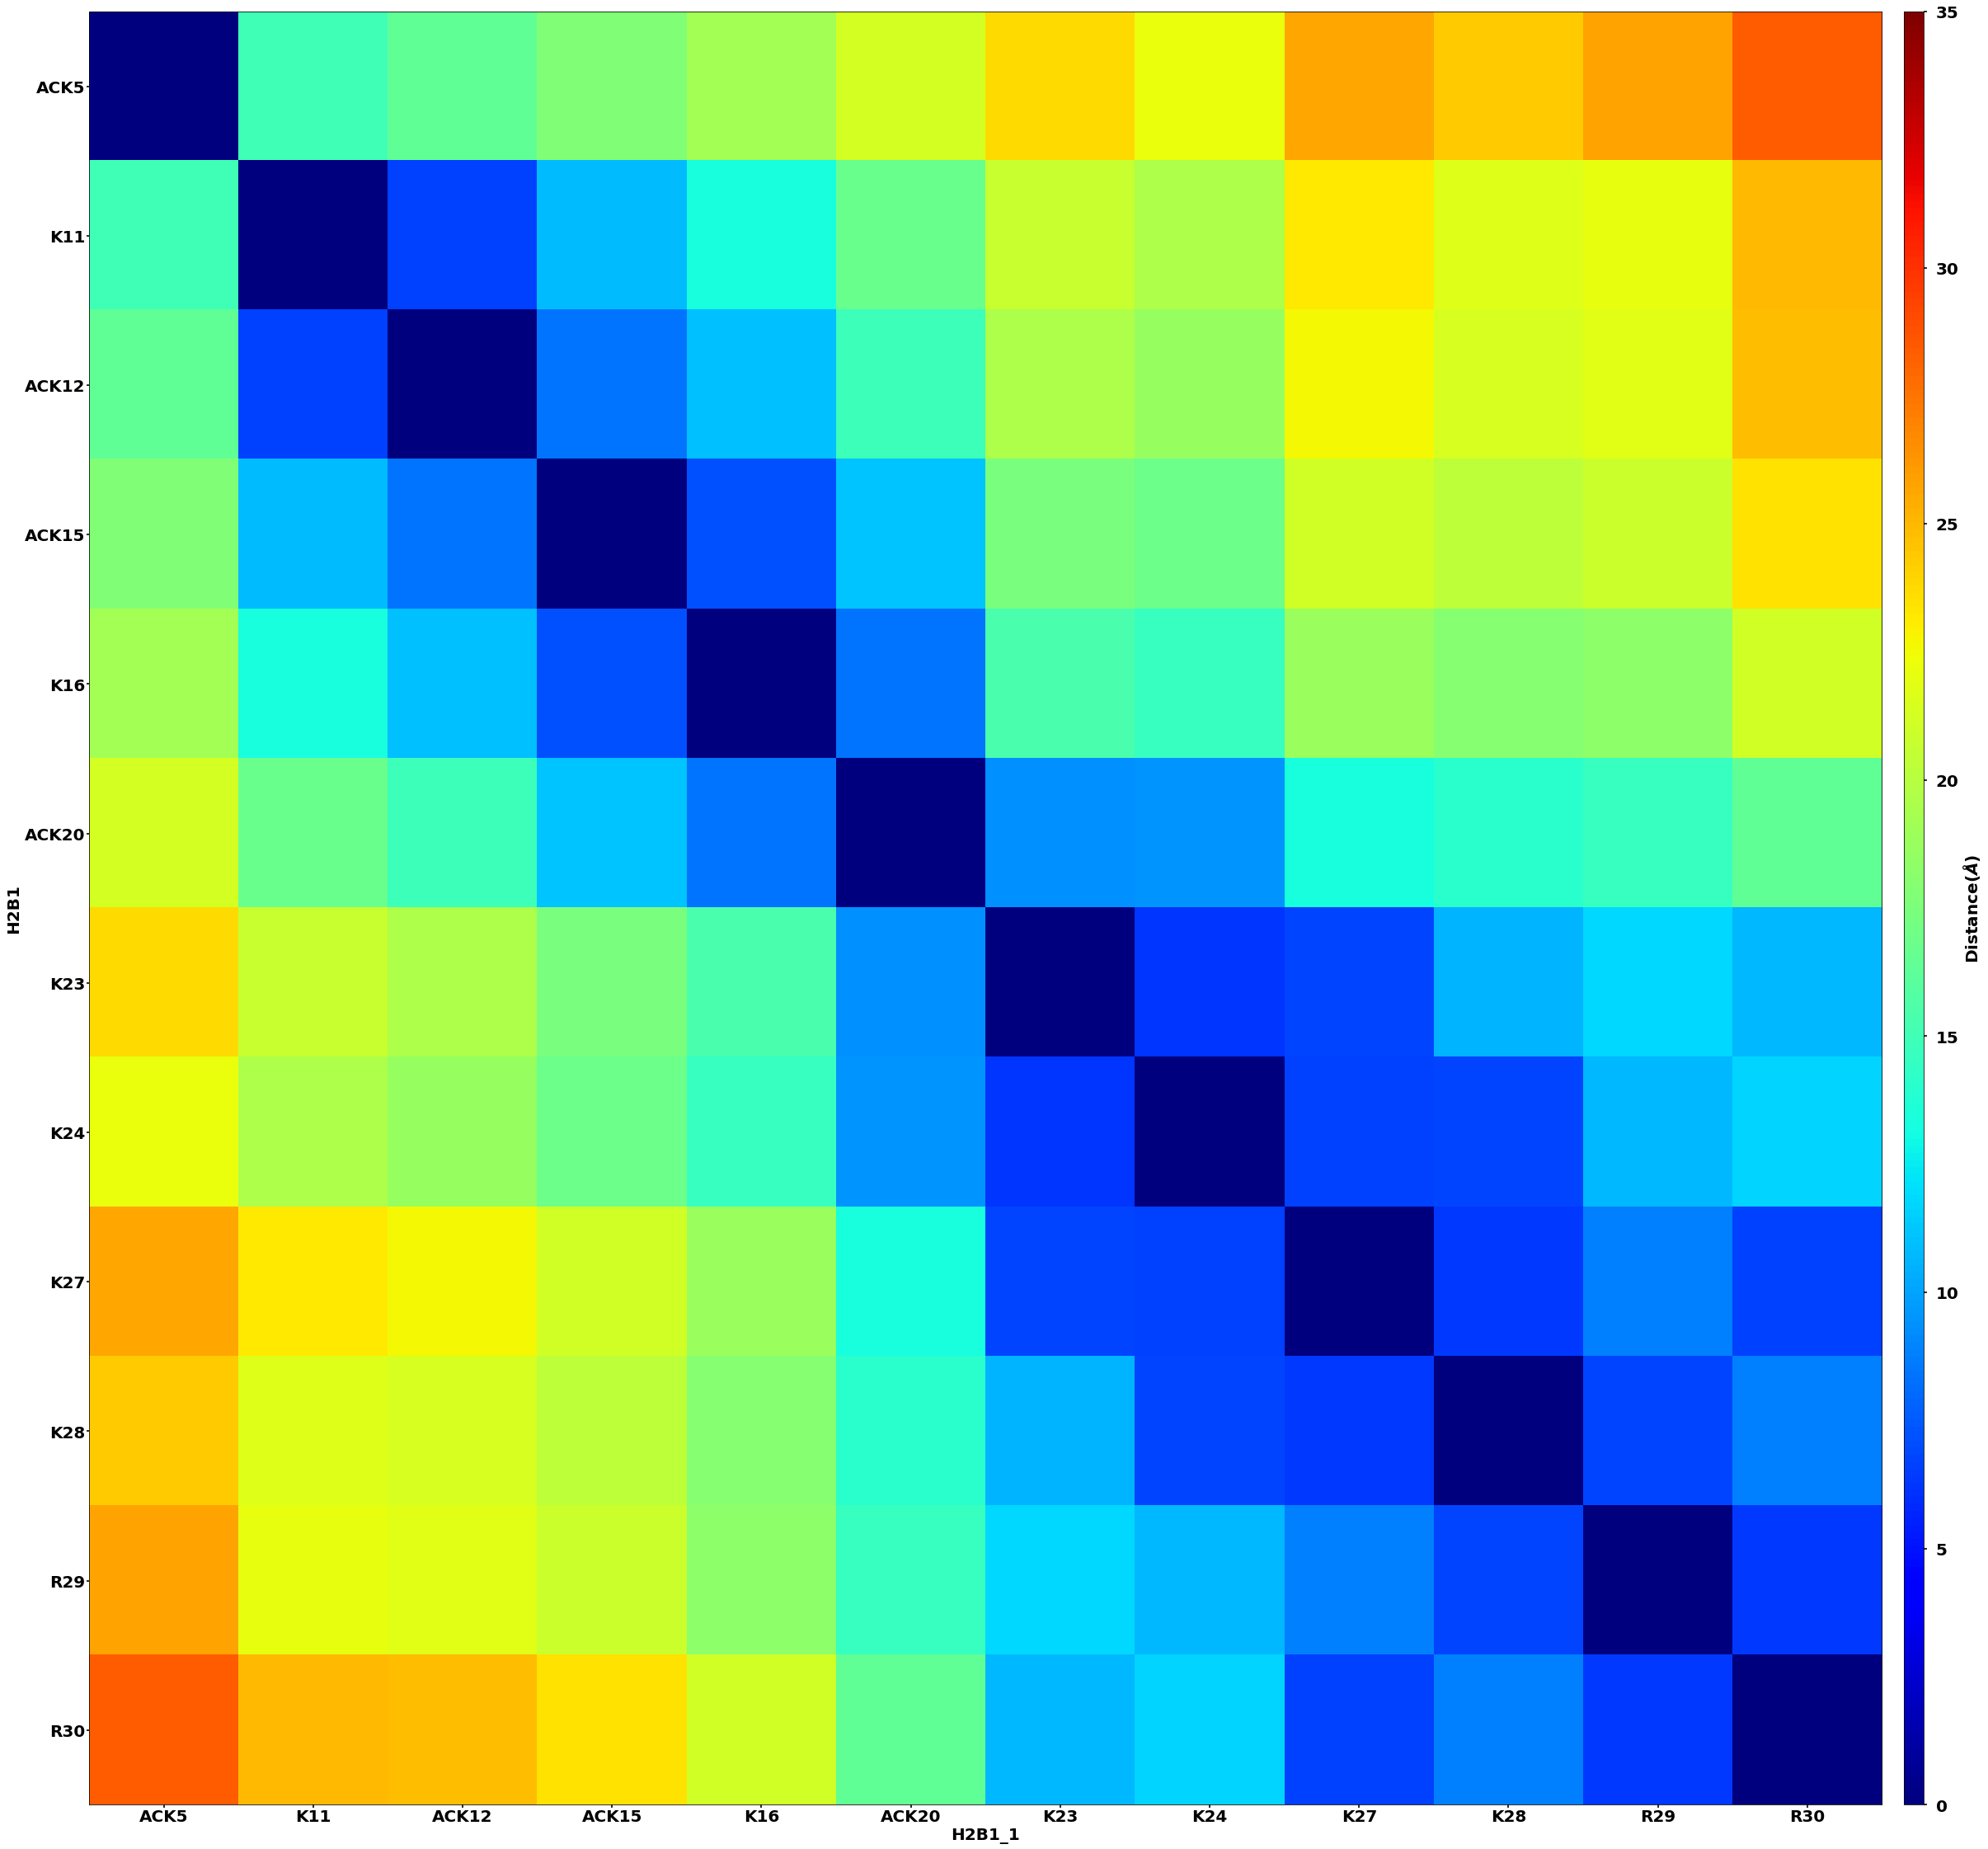

In [7]:
plt.style.use('seaborn-poster')
fig2, ax2 = plt.subplots(figsize=(47, 40))
im = ax2.imshow(res_dist_avg, origin='upper',  cmap = 'jet', vmin=0, vmax=35)
plt.ylabel("H2B1", fontsize = 20.0, fontweight="bold")
plt.xlabel("H2B1_1", fontsize = 20.0, fontweight="bold")
H2B1 =['ACK5', 'K11', 'ACK12', 'ACK15', 'K16', 'ACK20',  'K23', 'K24', 'K27', 'K28', 'R29', 'R30']
H2B1_1 = ['ACK5', 'K11', 'ACK12', 'ACK15', 'K16', 'ACK20',  'K23', 'K24',  'K27', 'K28', 'R29', 'R30']
plt.tick_params(labelsize=12, pad=1)

# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(H2B1)
ax2.set_xticklabels(H2B1_1)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# colorbar
cbar2 = fig2.colorbar(im, pad = 0.01, aspect = 90)
cbar2.ax.set_ylabel('Distance($\AA$)', fontsize = 20.0)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
cbar2.ax.tick_params(labelsize=20)
plt.tick_params(labelsize=20, pad=1)
plt.savefig('ACK_H2B_intratail.svg', format="svg",transparent=True)
plt.show()